# Assignment - Decision Tree


### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_excel("/content/heart_disease.xlsx",sheet_name= 'Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


### EDA

In [5]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

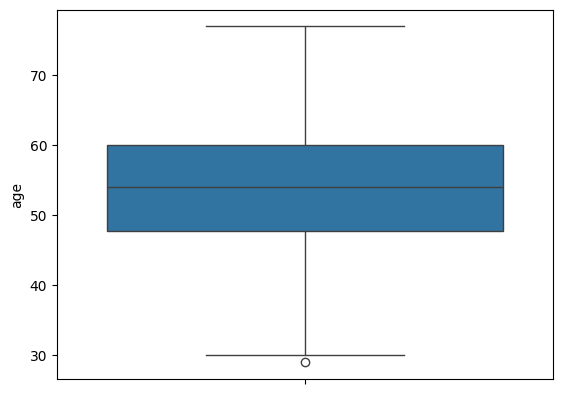

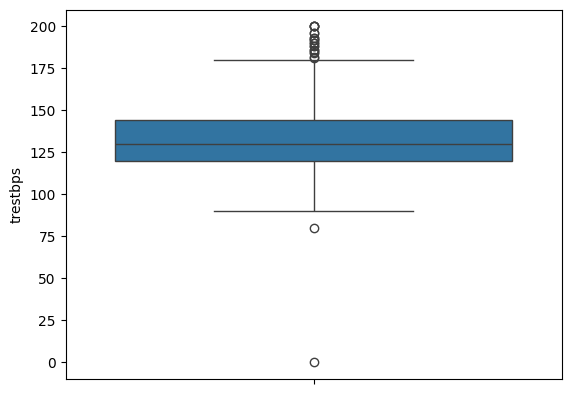

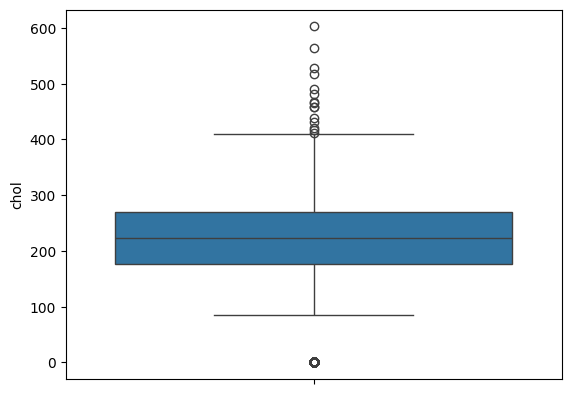

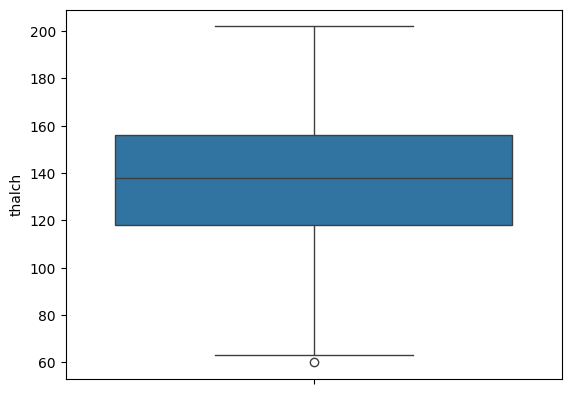

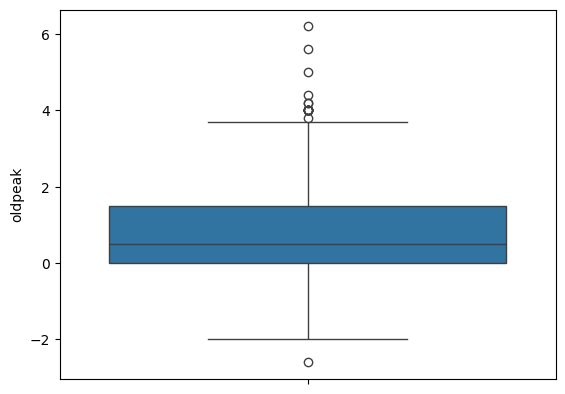

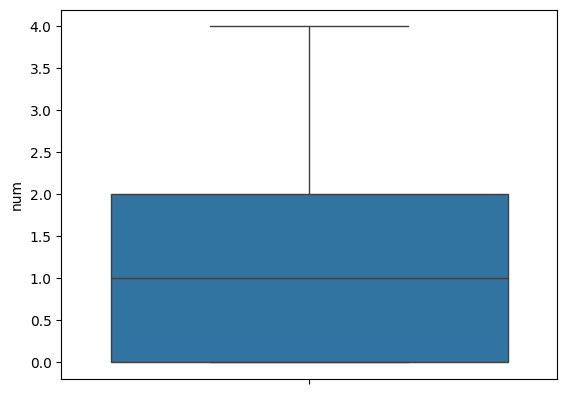

Unique values for sex: ['Male' 'Female']
Unique values for cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values for restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values for exang: [False True 'FALSE' 'TURE']
Unique values for slope: ['downsloping' 'flat' 'upsloping']
Unique values for thal: ['fixed defect' 'normal' 'reversable defect']


In [4]:

# Check for missing values
df.isnull().sum()

# Check for outliers
for col in df.select_dtypes(include=[np.number]):
    sns.boxplot(df[col])
    plt.show()

# Check for inconsistencies
for col in df.select_dtypes(include='object'):
    unique_values = df[col].unique()
    print(f"Unique values for {col}: {unique_values}")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.shape

(908, 13)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [13]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [14]:
df[df.duplicated()].shape

(1, 13)

In [15]:
df.nunique

<bound method DataFrame.nunique of      age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping  reversable defect    4  
904     120   True      3.0         flat  reversable defect    4  
905     123   True      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]>

### Visualization

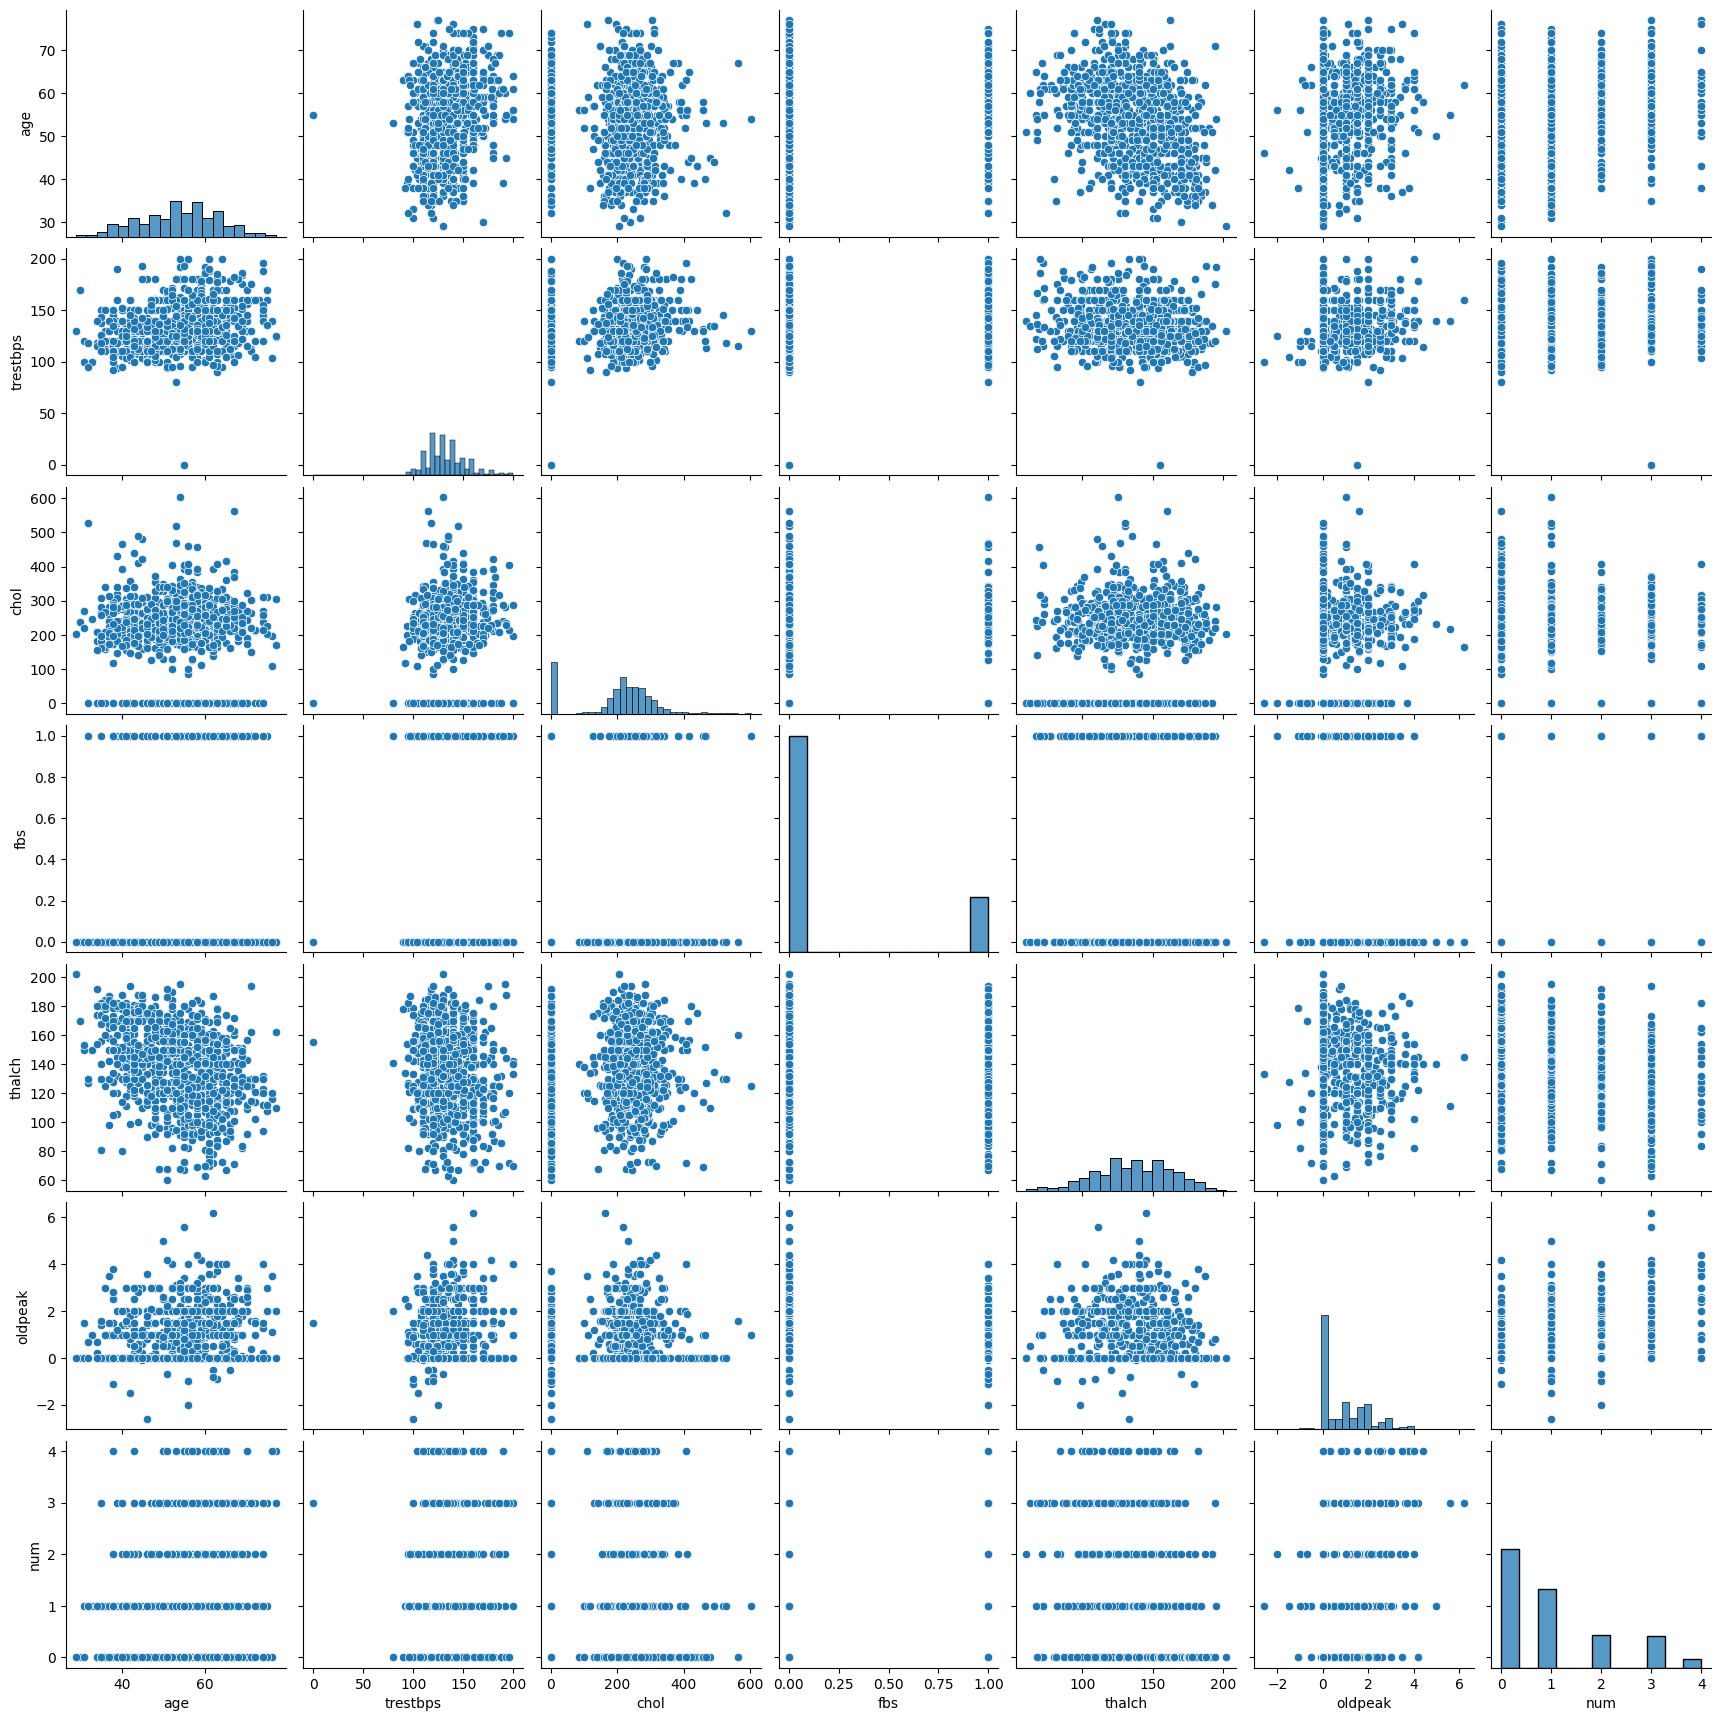

In [16]:
sns.pairplot(df)

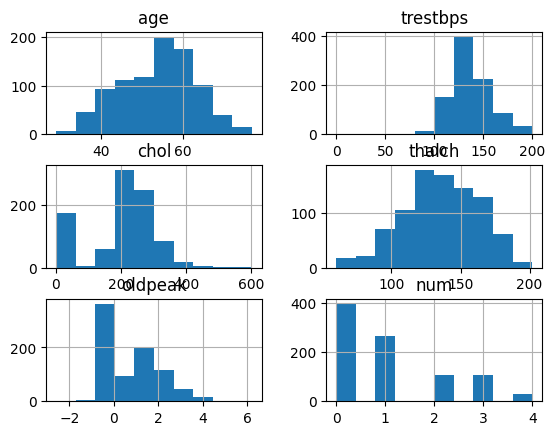

<function matplotlib.pyplot.show(close=None, block=None)>

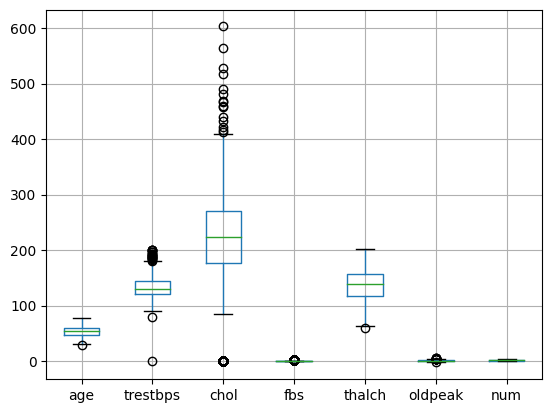

In [17]:
df.hist()
plt.show()
df.boxplot()
plt.show

### Feature Engineering:

In [20]:
for column in df.select_dtypes(include='object'):
  df[column] = df[column].astype(str)
  df[column] = le.fit_transform(df[column])

In [21]:
for column in df.select_dtypes(include='object'):
  if df[column].dtype != 'bool':
    df[column] = le.fit_transform(df[column])

In [22]:

le = preprocessing.LabelEncoder()
for column in df.select_dtypes(include='object'):
  df[column] = le.fit_transform(df[column])


In [23]:

from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(numerical_features)

# Transform the numerical features
scaled_features = scaler.transform(numerical_features)

# Replace missing values with the mean
df.fillna(df.mean(), inplace=True)


In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,1,2.3,0,0,0
1,41,1,1,135,203,False,1,132,1,0.0,1,0,0
2,57,1,0,140,192,False,1,148,1,0.4,1,0,0
3,52,1,3,118,186,False,0,190,1,0.0,1,0,0
4,57,1,0,110,201,False,1,126,3,1.5,1,0,0


### Decision Tree Classification:

In [29]:

x = df.iloc[:, 0:13]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



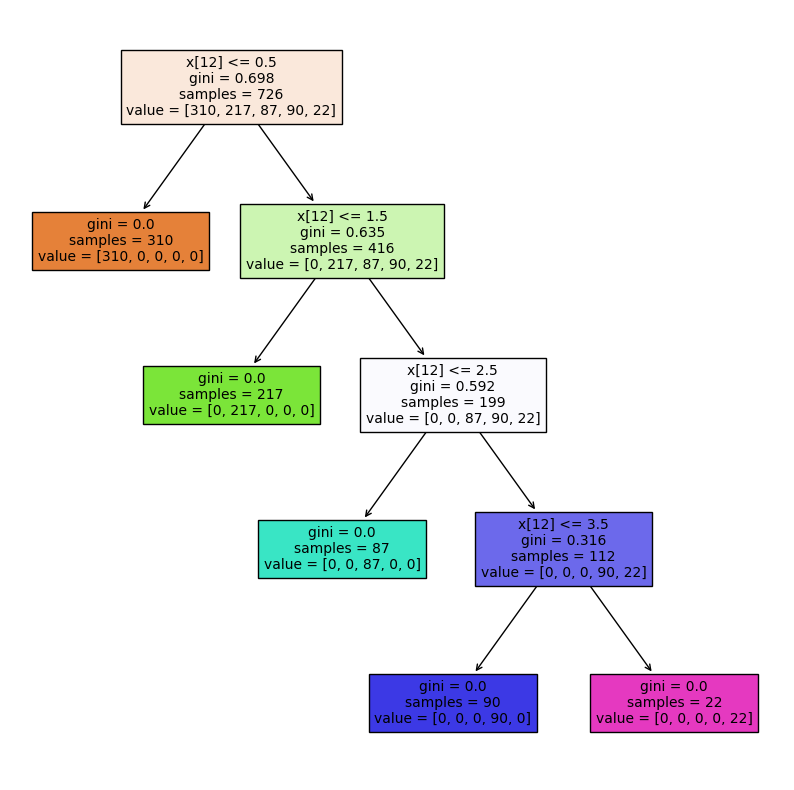

In [31]:

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier(criterion="gini",min_samples_leaf=10,max_depth=5)

# Train the model on the training data
clf = clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluate the model using classification report
print(classification_report(y_test, y_pred))

# Visualize the decision tree
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled="True")
plt.show()


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_fscore_support

# Train the model
clf.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') # Change the average parameter to 'micro'


# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: [1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1.]
F1 Score: 1.0


### Hyperparameter Tuning

In [39]:

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_depth': [3, 5, 7, 9]
}

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best parameters:", best_params)

# Train the model with the best hyperparameters
clf_best = DecisionTreeClassifier(**best_params)
clf_best.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_best = clf_best.predict(x_test)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average=None)
recall_best = recall_score(y_test, y_pred_best, average=None)
f1_best = f1_score(y_test, y_pred_best, average='micro')

# Print the evaluation metrics
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1.]
F1 Score: 1.0


In [40]:

# Define a list of maximum depths to try
max_depths = [3, 5, 7, 9]

# Define a list of minimum samples splits to try
min_samples_splits = [5, 10, 15, 20]

# Define a list of criteria to try
criteria = ['gini', 'entropy']

# Create a list to store the results
results = []

# Loop over each maximum depth
for max_depth in max_depths:
    # Loop over each minimum samples split
    for min_samples_split in min_samples_splits:
        # Loop over each criterion
        for criterion in criteria:
            # Create a decision tree classifier with the current parameters
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)

            # Train the classifier on the training data
            clf.fit(x_train, y_train)

            # Make predictions on the testing data
            y_pred = clf.predict(x_test)

            # Calculate the accuracy of the predictions
            accuracy = accuracy_score(y_test, y_pred)

            # Store the results in a dictionary
            result = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'criterion': criterion,
                'accuracy': accuracy
            }

            # Add the results to the list
            results.append(result)

# Print the results
for result in results:
    print(result)


{'max_depth': 3, 'min_samples_split': 5, 'criterion': 'gini', 'accuracy': 0.967032967032967}
{'max_depth': 3, 'min_samples_split': 5, 'criterion': 'entropy', 'accuracy': 0.967032967032967}
{'max_depth': 3, 'min_samples_split': 10, 'criterion': 'gini', 'accuracy': 0.967032967032967}
{'max_depth': 3, 'min_samples_split': 10, 'criterion': 'entropy', 'accuracy': 0.967032967032967}
{'max_depth': 3, 'min_samples_split': 15, 'criterion': 'gini', 'accuracy': 0.967032967032967}
{'max_depth': 3, 'min_samples_split': 15, 'criterion': 'entropy', 'accuracy': 0.967032967032967}
{'max_depth': 3, 'min_samples_split': 20, 'criterion': 'gini', 'accuracy': 0.967032967032967}
{'max_depth': 3, 'min_samples_split': 20, 'criterion': 'entropy', 'accuracy': 0.967032967032967}
{'max_depth': 5, 'min_samples_split': 5, 'criterion': 'gini', 'accuracy': 1.0}
{'max_depth': 5, 'min_samples_split': 5, 'criterion': 'entropy', 'accuracy': 1.0}
{'max_depth': 5, 'min_samples_split': 10, 'criterion': 'gini', 'accuracy': 1.

### Model Evaluation and Analysis:

[[89  0  0  0  0]
 [ 0 48  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0  6]]
Sensitivity: 1.0
Specificity: 1.0
Positive predictive value: 1.0
Negative predictive value: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



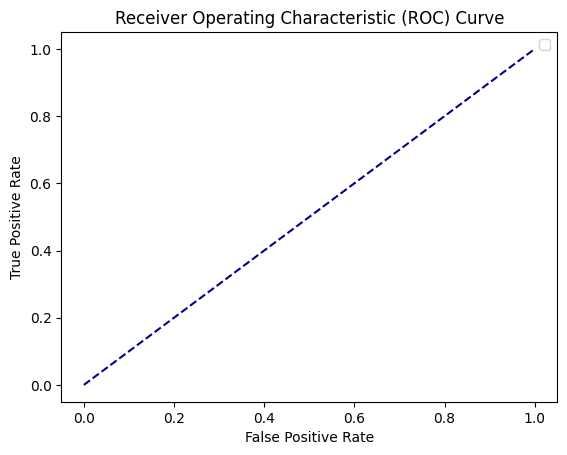

In [50]:

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Calculate the sensitivity and specificity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Print the sensitivity and specificity
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Calculate the positive predictive value and negative predictive value
ppv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
npv = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Print the positive predictive value and negative predictive value
print("Positive predictive value:", ppv)
print("Negative predictive value:", npv)


# Create a classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


# Plot the ROC curve

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate the area under the ROC curve
from sklearn.metrics import roc_auc_score





## Interview Questions

### Question 1

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

### Answer

Hyperparameters like max depth, min samples split, min samples leaf, max features, criterion, and splitter affect a decision tree's performance by controlling its complexity, bias-variance tradeoff, computational complexity, and interpretability. Adjusting these hyperparameters helps prevent overfitting, balance model complexity, and manage computational resources.

### Question 2
What is the difference between the Label encoding and One-hot encoding?

### Answer

Label encoding assigns each category a unique numerical label, while one-hot encoding creates binary vectors where each category is represented by a separate binary feature. Label encoding is suitable for ordinal data, while one-hot encoding is preferable for nominal data to avoid unintended ordinal relationships and maintain independence among categories.